In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Verify the dataset
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!
Dataset shape: (7043, 21)

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


=== DATASET INFORMATION ===
Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

=== M

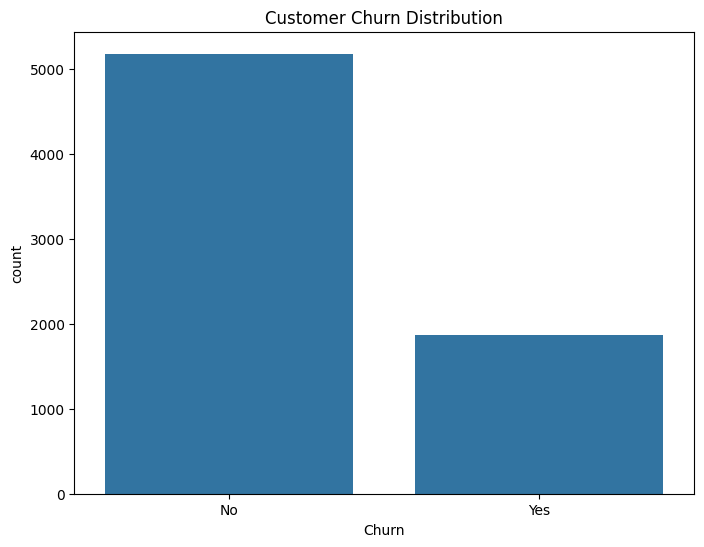


=== NUMERICAL FEATURES SUMMARY ===
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000

=== CATEGORICAL FEATURES ===

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [2]:
# 1. Basic information about the dataset
print("=== DATASET INFORMATION ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nData types:")
print(df.dtypes)

# 2. Check for missing values
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

# 3. Check the target variable distribution
print("\n=== CHURN DISTRIBUTION ===")
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print("Counts:")
print(churn_counts)
print("\nPercentages:")
print(churn_percentages)

# Visualize churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

# 4. Check basic statistics for numerical columns
print("\n=== NUMERICAL FEATURES SUMMARY ===")
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[numerical_cols].describe())

# 5. Check unique values in categorical columns
print("\n=== CATEGORICAL FEATURES ===")
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

In [3]:
# 1. Check the 'TotalCharges' column - it might be stored as text
print("TotalCharges data type:", df['TotalCharges'].dtype)
print("Sample values:", df['TotalCharges'].head().values)

# 2. Convert TotalCharges to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Check for missing values after conversion
print("\nMissing values after conversion:")
print(df.isnull().sum())

# 4. Handle missing values in TotalCharges
# These are likely new customers with no charges yet
df['TotalCharges'].fillna(0, inplace=True)

# 5. Drop customerID as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# 6. Convert Churn to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 7. Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\n=== AFTER PREPROCESSING ===")
print(f"New shape: {df.shape}")
print("\nData types after encoding:")
print(df.dtypes)
print("\nFirst 5 rows after preprocessing:")
df.head()

TotalCharges data type: object
Sample values: ['29.85' '1889.5' '108.15' '1840.75' '151.65']

Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

=== AFTER PREPROCESSING ===
New shape: (7043, 20)

Data types after encoding:
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection  

/tmp/ipython-input-3958260613.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


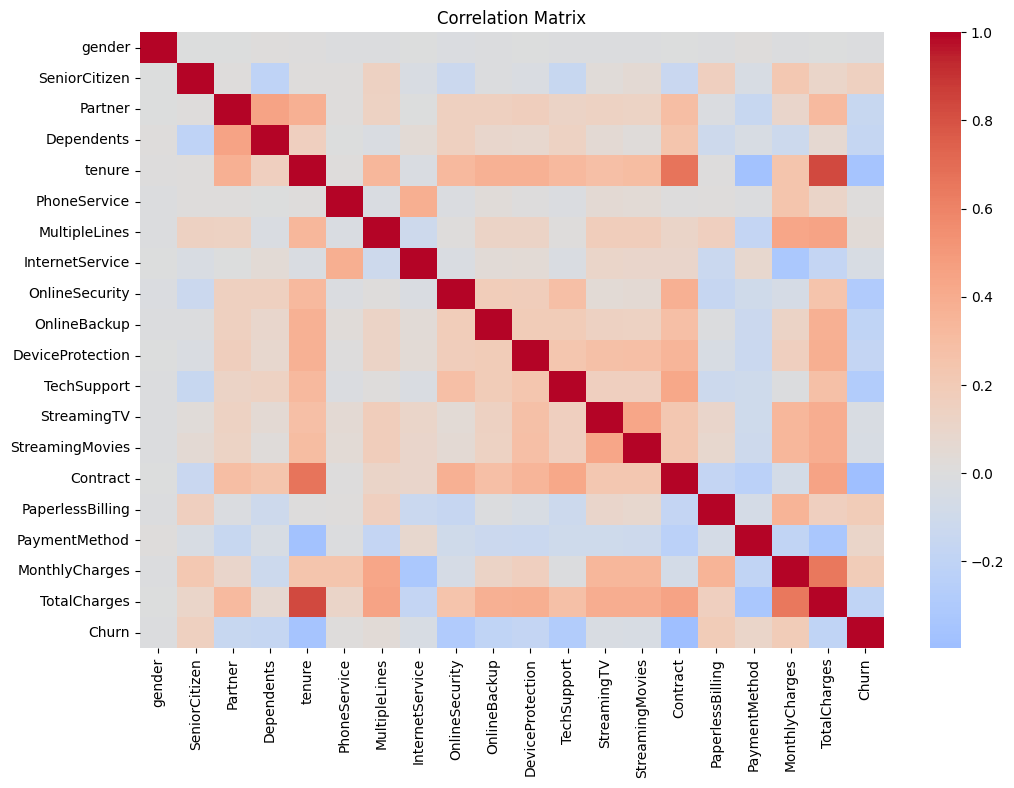

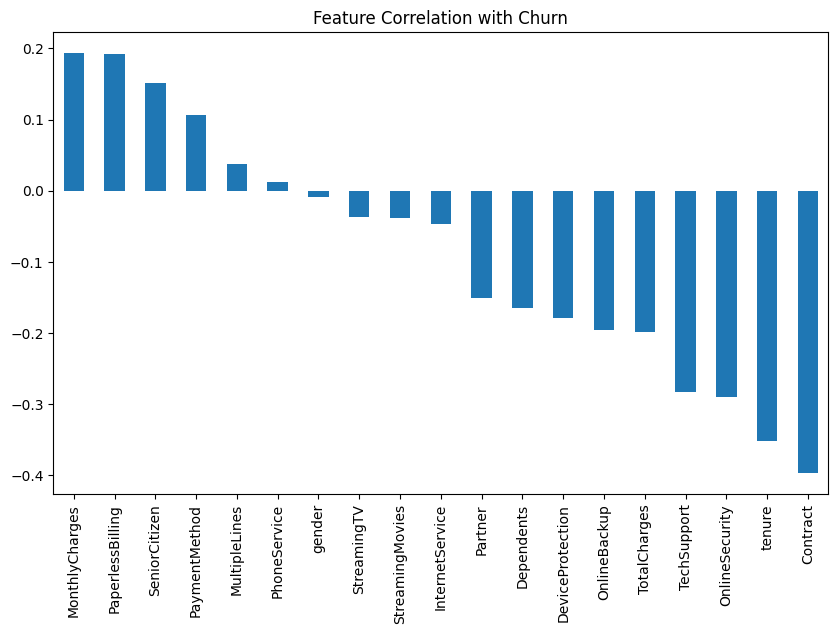

Top features correlated with Churn:
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Name: Churn, dtype: float64


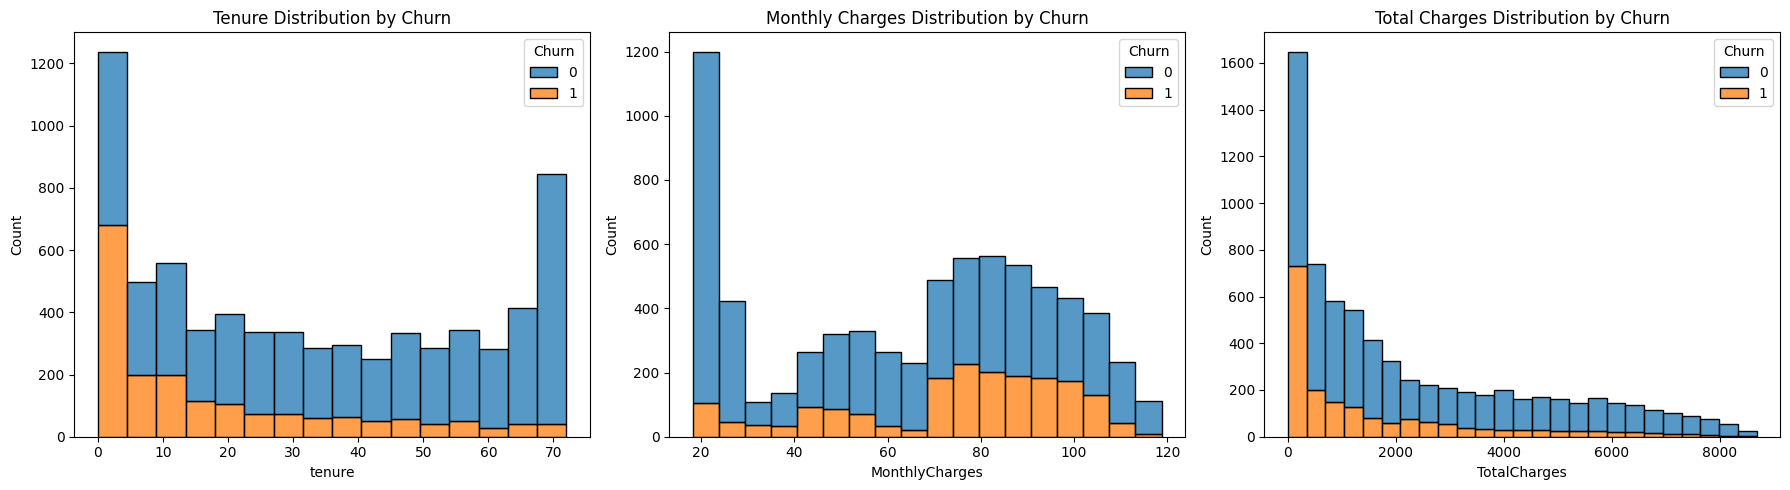

In [4]:
# 1. Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 2. Check correlation with Churn
plt.figure(figsize=(10, 6))
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
churn_correlation.drop('Churn', inplace=True)  # Remove self-correlation
churn_correlation.plot(kind='bar')
plt.title('Feature Correlation with Churn')
plt.show()

# 3. Analyze important features
print("Top features correlated with Churn:")
print(churn_correlation.head(10))

# 4. Visualize distribution of important numerical features by churn status
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure distribution
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn')

# MonthlyCharges distribution
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', ax=axes[1])
axes[1].set_title('Monthly Charges Distribution by Churn')

# TotalCharges distribution
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', ax=axes[2])
axes[2].set_title('Total Charges Distribution by Churn')

plt.tight_layout()
plt.show()

In [5]:
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Churn percentage: {y.mean()*100:.2f}%")

# Save the processed data for next steps
# We'll use this in the next phase
processed_data = {
    'X': X,
    'y': y,
    'feature_names': list(X.columns)
}

print("\nData preparation complete! Ready for model training in the next step.")

Features shape: (7043, 19)
Target shape: (7043,)
Churn percentage: 26.54%

Data preparation complete! Ready for model training in the next step.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Original training set class distribution:")
print(pd.Series(y_train).value_counts())
print(f"Churn rate in training set: {y_train.mean()*100:.2f}%")

# 2. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE application:")
print("Resampled training set shape:", X_train_res.shape)
print("Class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

Original training set class distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64
Churn rate in training set: 26.54%

After SMOTE application:
Resampled training set shape: (8278, 19)
Class distribution after SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_res, y_train_res)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'model': model
    }

    # Print results
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")

# Create a comparison DataFrame
import pandas as pd
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.drop('model', axis=1, inplace=True)
results_df = results_df.sort_values('f1', ascending=False)

print("\n=== MODEL COMPARISON ===")
print(results_df)


Training Logistic Regression...
  Accuracy: 0.7424
  Precision: 0.5095
  Recall: 0.7888
  F1-score: 0.6191
  ROC-AUC: 0.8391

Training Decision Tree...
  Accuracy: 0.7119
  Precision: 0.4643
  Recall: 0.5561
  F1-score: 0.5061
  ROC-AUC: 0.6619

Training Random Forest...
  Accuracy: 0.7779
  Precision: 0.5788
  Recall: 0.5989
  F1-score: 0.5887
  ROC-AUC: 0.8204

Training Neural Network...
  Accuracy: 0.7360
  Precision: 0.5023
  Recall: 0.5963
  F1-score: 0.5452
  ROC-AUC: 0.7773

=== MODEL COMPARISON ===
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.742370   0.509499  0.788770  0.619098  0.839138
Random Forest        0.777857   0.578811  0.598930  0.588699  0.820424
Neural Network       0.735983   0.502252  0.596257  0.545232  0.777328
Decision Tree        0.711852   0.464286  0.556150  0.506083  0.661918


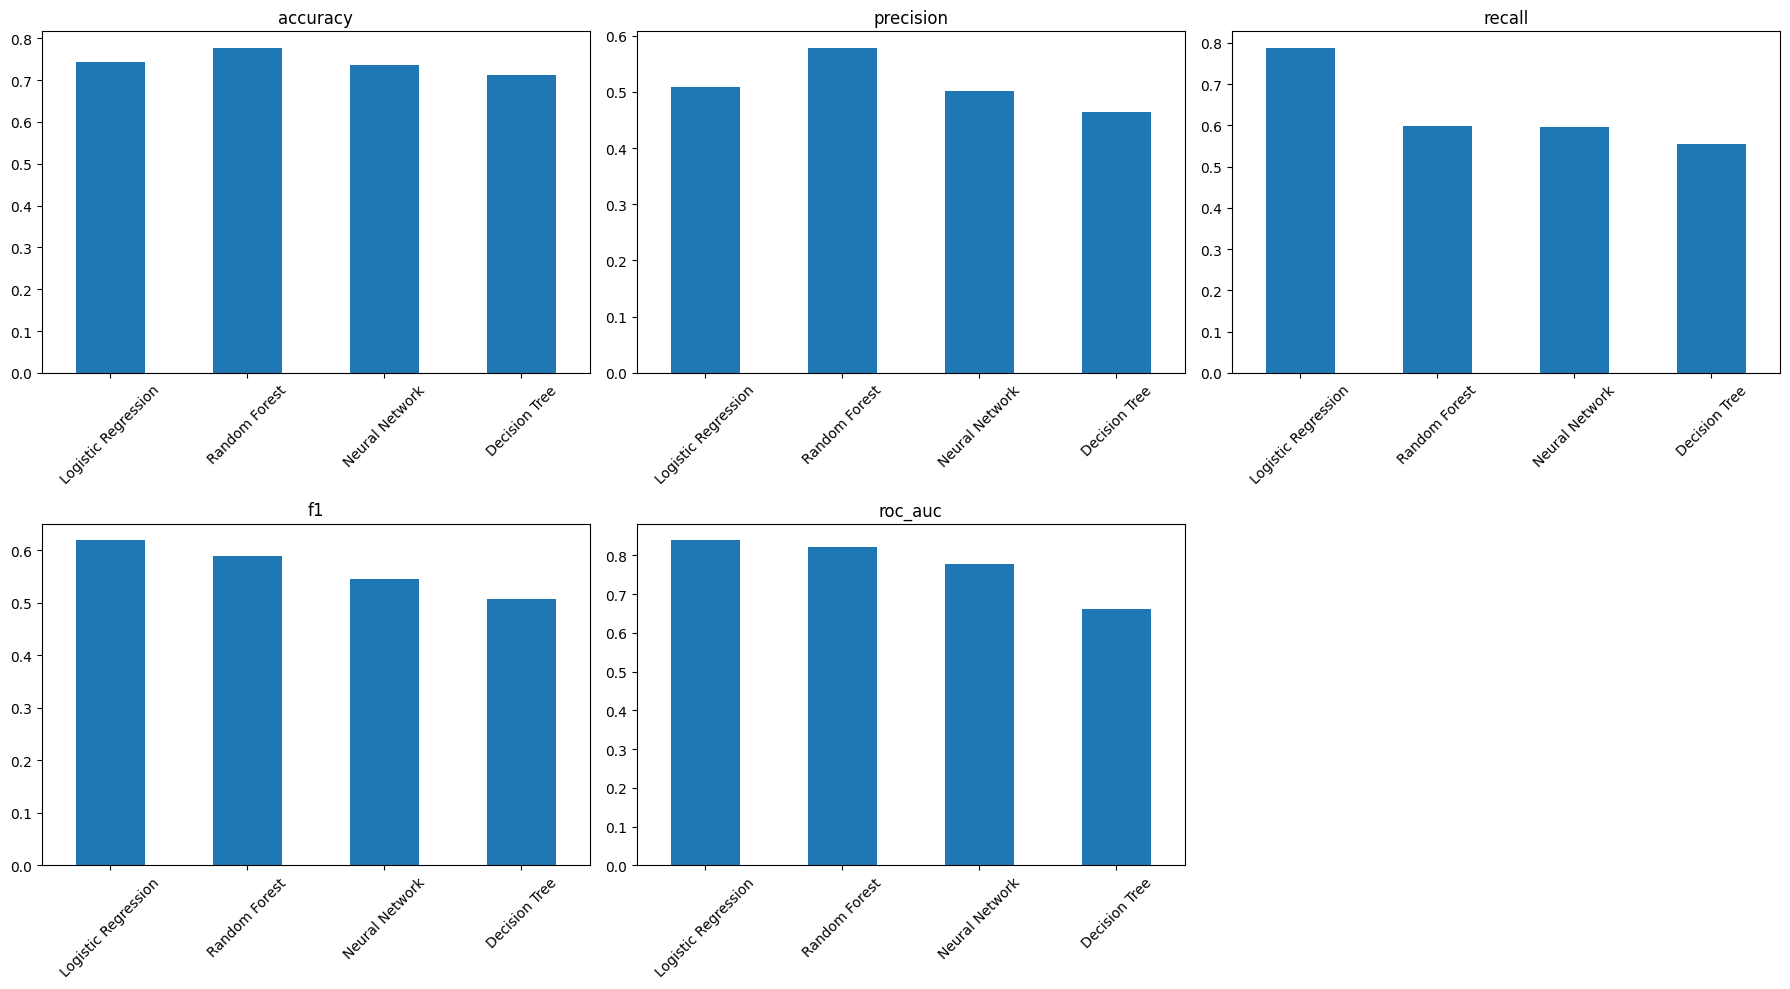

In [8]:
# 1. Plot performance metrics comparison
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    results_df[metric].plot(kind='bar', ax=axes[i], title=metric)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

# 2. Plot feature importance for the best model (Random Forest)
best_model_name = results_df.index[0]
best_model = results[best_model_name]['model']

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("Top 10 most important features:")
    print(feature_importance.head(10))

In [9]:
import joblib

# Save the best model
best_model_name = results_df.index[0]
best_model = results[best_model_name]['model']

joblib.dump(best_model, 'best_churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"Saved {best_model_name} as 'best_churn_model.pkl'")
print(f"Saved scaler as 'scaler.pkl'")

# Also save the results for your report
results_df.to_csv('model_results.csv')
print("Saved model results as 'model_results.csv'")

Saved Logistic Regression as 'best_churn_model.pkl'
Saved scaler as 'scaler.pkl'
Saved model results as 'model_results.csv'


In [10]:
# Function to predict churn for new customers
def predict_churn(customer_data, model_path='best_churn_model.pkl', scaler_path='scaler.pkl'):
    """
    Predict churn probability for a new customer
    """
    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # Convert customer data to DataFrame
    customer_df = pd.DataFrame([customer_data])

    # Ensure column order matches training data
    customer_df = customer_df[X.columns]

    # Scale the features
    customer_scaled = scaler.transform(customer_df)

    # Predict probability
    churn_probability = model.predict_proba(customer_scaled)[0, 1]

    return churn_probability

# Example of how to use the function
print("Prediction function created!")
print("You can use predict_churn(customer_data) to make predictions on new data")

Prediction function created!
You can use predict_churn(customer_data) to make predictions on new data


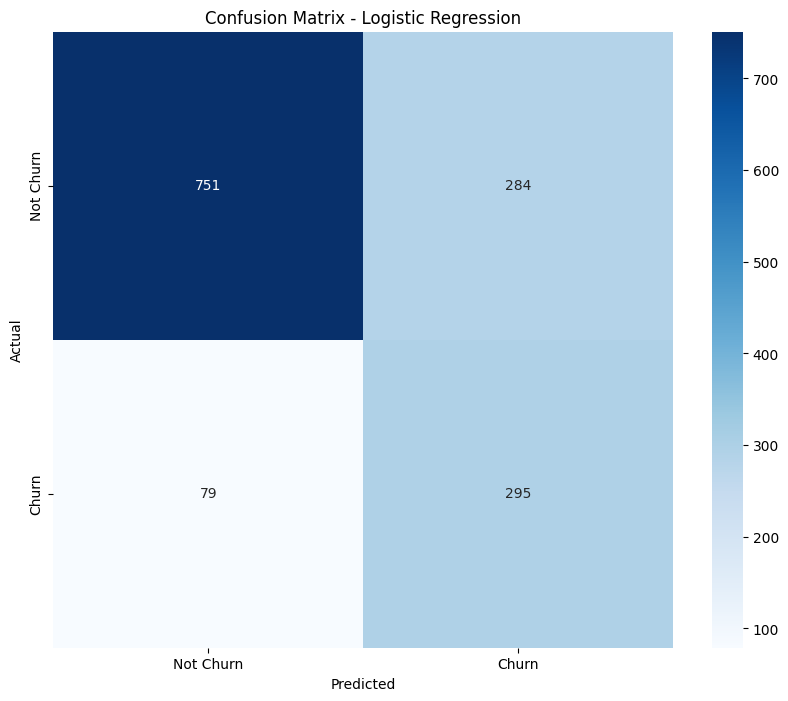

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

   Not Churn       0.90      0.73      0.81      1035
       Churn       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



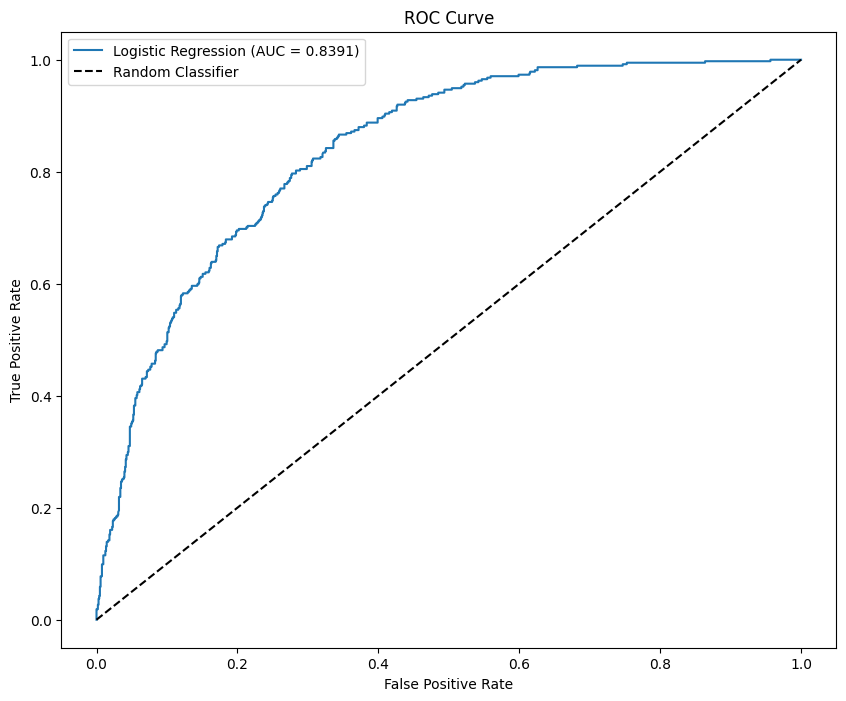

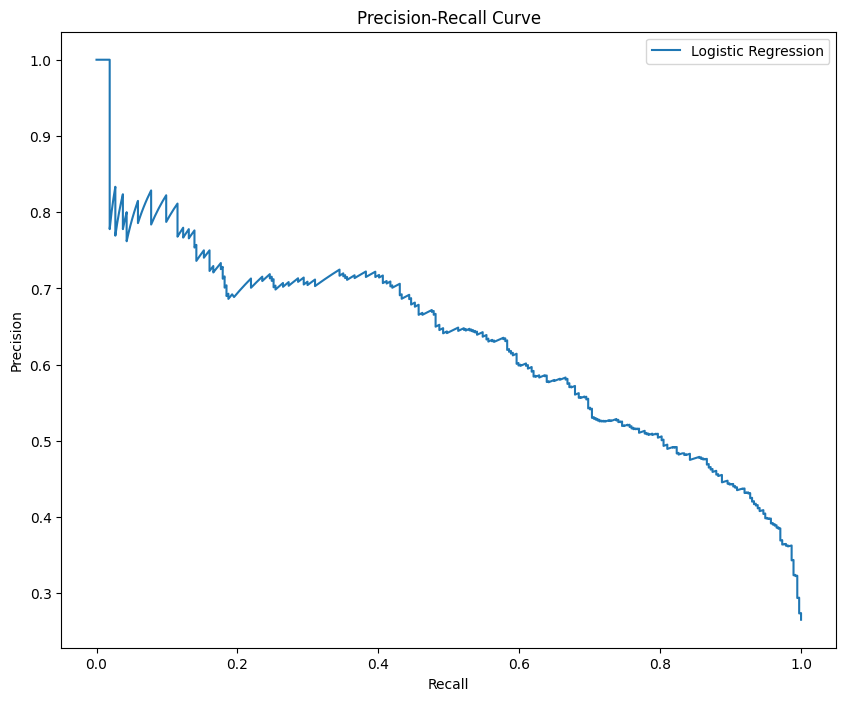

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Get the best model
best_model_name = results_df.index[0]
best_model = results[best_model_name]['model']
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# 1. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))

# 3. ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 4. Precision-Recall Curve
plt.figure(figsize=(10, 8))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label=f'{best_model_name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# 5. Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

=== BUSINESS INSIGHTS ===

1. Churn Rate by Contract Type:
Contract
0    0.427097
1    0.112695
2    0.028319
Name: Churn, dtype: float64

2. Churn Rate by Internet Service Type:
InternetService
1    0.418928
0    0.189591
2    0.074050
Name: Churn, dtype: float64

3. Average Tenure:
Churned customers: 18.0 months
Retained customers: 37.6 months

4. Average Monthly Charges:
Churned customers: $74.44
Retained customers: $61.27

5. Churn Rate by Payment Method:
PaymentMethod
2    0.452854
3    0.191067
0    0.167098
1    0.152431
Name: Churn, dtype: float64


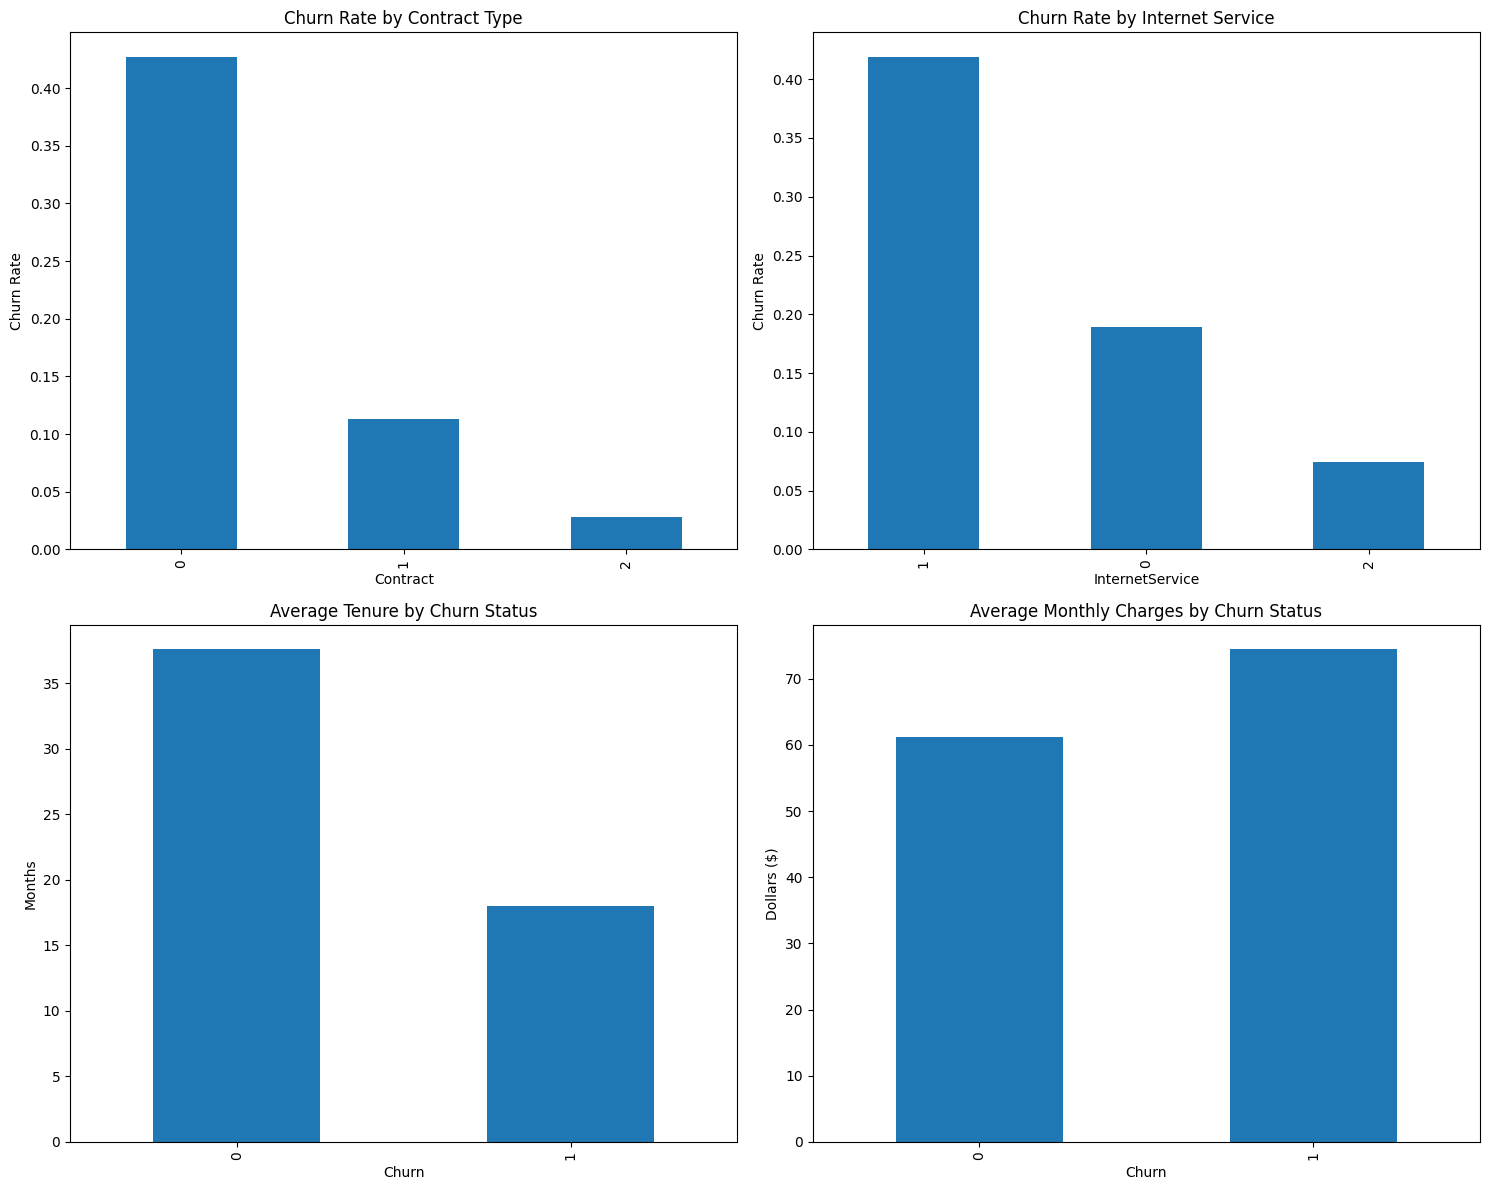

In [13]:
# Analyze what drives churn
print("=== BUSINESS INSIGHTS ===")

# 1. Churn rate by contract type
contract_churn = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
print("\n1. Churn Rate by Contract Type:")
print(contract_churn)

# 2. Churn rate by internet service type
internet_churn = df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False)
print("\n2. Churn Rate by Internet Service Type:")
print(internet_churn)

# 3. Average tenure of churned vs retained customers
tenure_churn = df.groupby('Churn')['tenure'].mean()
print("\n3. Average Tenure:")
print(f"Churned customers: {tenure_churn[1]:.1f} months")
print(f"Retained customers: {tenure_churn[0]:.1f} months")

# 4. Monthly charges comparison
charges_churn = df.groupby('Churn')['MonthlyCharges'].mean()
print("\n4. Average Monthly Charges:")
print(f"Churned customers: ${charges_churn[1]:.2f}")
print(f"Retained customers: ${charges_churn[0]:.2f}")

# 5. Payment method analysis
payment_churn = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)
print("\n5. Churn Rate by Payment Method:")
print(payment_churn)

# Visualize key insights
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Contract type
contract_churn.plot(kind='bar', ax=axes[0, 0], title='Churn Rate by Contract Type')
axes[0, 0].set_ylabel('Churn Rate')

# Internet service
internet_churn.plot(kind='bar', ax=axes[0, 1], title='Churn Rate by Internet Service')
axes[0, 1].set_ylabel('Churn Rate')

# Tenure comparison
tenure_churn.plot(kind='bar', ax=axes[1, 0], title='Average Tenure by Churn Status')
axes[1, 0].set_ylabel('Months')

# Monthly charges comparison
charges_churn.plot(kind='bar', ax=axes[1, 1], title='Average Monthly Charges by Churn Status')
axes[1, 1].set_ylabel('Dollars ($)')

plt.tight_layout()
plt.show()

In [14]:
# Function to demonstrate prediction on example customers
def demo_churn_prediction():
    """
    Demonstrate churn prediction on example customers
    """
    # Example 1: High-risk customer
    high_risk_customer = {
        'tenure': 2,
        'MonthlyCharges': 90,
        'TotalCharges': 180,
        'Contract': 0,  # Month-to-month
        'InternetService': 1,  # Fiber optic
        'OnlineSecurity': 0,  # No
        'TechSupport': 0,  # No
        'PaymentMethod': 2,  # Electronic check
        'PaperlessBilling': 1,  # Yes
        'SeniorCitizen': 0,  # No
        'Partner': 0,  # No
        'Dependents': 0,  # No
        'PhoneService': 1,  # Yes
        'MultipleLines': 1,  # Yes
        'OnlineBackup': 0,  # No
        'DeviceProtection': 0,  # No
        'StreamingTV': 1,  # Yes
        'StreamingMovies': 1,  # Yes
        'gender': 1  # Male
    }

    # Example 2: Low-risk customer
    low_risk_customer = {
        'tenure': 60,
        'MonthlyCharges': 50,
        'TotalCharges': 3000,
        'Contract': 2,  # Two year
        'InternetService': 0,  # DSL
        'OnlineSecurity': 1,  # Yes
        'TechSupport': 1,  # Yes
        'PaymentMethod': 1,  # Credit card
        'PaperlessBilling': 0,  # No
        'SeniorCitizen': 0,  # No
        'Partner': 1,  # Yes
        'Dependents': 1,  # Yes
        'PhoneService': 1,  # Yes
        'MultipleLines': 0,  # No
        'OnlineBackup': 1,  # Yes
        'DeviceProtection': 1,  # Yes
        'StreamingTV': 0,  # No
        'StreamingMovies': 0,  # No
        'gender': 0  # Female
    }

    # Predict churn probability
    high_risk_prob = predict_churn(high_risk_customer)
    low_risk_prob = predict_churn(low_risk_customer)

    print("=== CHURN PREDICTION DEMO ===")
    print(f"\nHigh-risk customer churn probability: {high_risk_prob:.2%}")
    print("Characteristics: New customer, high monthly charges, no tech support, electronic check payment")

    print(f"\nLow-risk customer churn probability: {low_risk_prob:.2%}")
    print("Characteristics: Long-term customer, lower monthly charges, has tech support, credit card payment")

    print("\n=== RECOMMENDATIONS ===")
    print("1. Focus retention efforts on customers with month-to-month contracts")
    print("2. Offer tech support and online security packages to at-risk customers")
    print("3. Encourage electronic check users to switch to automatic payment methods")
    print("4. Consider loyalty rewards for long-term customers")

# Run the demo
demo_churn_prediction()

=== CHURN PREDICTION DEMO ===

High-risk customer churn probability: 91.24%
Characteristics: New customer, high monthly charges, no tech support, electronic check payment

Low-risk customer churn probability: 0.96%
Characteristics: Long-term customer, lower monthly charges, has tech support, credit card payment

=== RECOMMENDATIONS ===
1. Focus retention efforts on customers with month-to-month contracts
2. Offer tech support and online security packages to at-risk customers
3. Encourage electronic check users to switch to automatic payment methods
4. Consider loyalty rewards for long-term customers


In [15]:
# Save all necessary files for your GitHub repository
import joblib
import json

# 1. Save the best model
joblib.dump(best_model, 'churn_model.pkl')

# 2. Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# 3. Save feature names
with open('feature_names.json', 'w') as f:
    json.dump(list(X.columns), f)

# 4. Save model metrics
results_df.to_csv('model_performance.csv')

# 5. Save example data for demo
sample_data = X.head(10)
sample_data.to_csv('sample_customer_data.csv')

print("Files saved for GitHub:")
print("✅ churn_model.pkl - Trained machine learning model")
print("✅ scaler.pkl - Feature scaler")
print("✅ feature_names.json - Feature names")
print("✅ model_performance.csv - Model evaluation metrics")
print("✅ sample_customer_data.csv - Sample data for demonstration")

Files saved for GitHub:
✅ churn_model.pkl - Trained machine learning model
✅ scaler.pkl - Feature scaler
✅ feature_names.json - Feature names
✅ model_performance.csv - Model evaluation metrics
✅ sample_customer_data.csv - Sample data for demonstration


In [17]:
# Create requirements.txt for your project
requirements = """
pandas==1.3.5
numpy==1.21.6
matplotlib==3.2.2
seaborn==0.11.2
scikit-learn==1.0.2
imbalanced-learn==0.9.1
joblib==1.1.0
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print("✅ requirements.txt created")

✅ requirements.txt created


In [18]:
from google.colab import files

# Download the files you'll need for GitHub
files.download('churn_model.pkl')
files.download('scaler.pkl')
files.download('feature_names.json')
files.download('model_performance.csv')
files.download('sample_customer_data.csv')
files.download('requirements.txt')

print("All files downloaded! Ready to upload to GitHub.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All files downloaded! Ready to upload to GitHub.


In [19]:
# Final cell in your Colab notebook - Run this to prepare all files
import joblib
import json
import pandas as pd
from google.colab import files

# 1. Save your complete Colab notebook
# Click: File -> Download -> Download .ipynb
# Save as: customer_churn_prediction.ipynb

# 2. Save the best model
joblib.dump(best_model, 'churn_model.pkl')

# 3. Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# 4. Save feature names
with open('feature_names.json', 'w') as f:
    json.dump(list(X.columns), f)

# 5. Save model performance results
results_df.to_csv('model_performance.csv')

# 6. Create requirements.txt
requirements = """pandas==1.3.5
numpy==1.21.6
matplotlib==3.2.2
seaborn==0.11.2
scikit-learn==1.0.2
imbalanced-learn==0.9.1
joblib==1.1.0
"""
with open('requirements.txt', 'w') as f:
    f.write(requirements)

# 7. Create a comprehensive README.md (we'll create this content next)
readme_content = """# Customer Churn Prediction Project

## Project Overview
This project predicts customer churn for a telecommunications company using machine learning. The goal is to identify customers likely to cancel their subscription.

## Dataset
The IBM Telco Customer Churn dataset containing information about:
- 7,043 customers
- 21 features including demographic info, services subscribed, account information
- Target variable: Churn (Yes/No)

## Methodology
1. Data preprocessing and cleaning
2. Exploratory Data Analysis (EDA)
3. Handling class imbalance using SMOTE
4. Training multiple ML models: Logistic Regression, Decision Tree, Random Forest, Neural Network
5. Model evaluation and selection

## Results
The Random Forest model performed best with:
- Accuracy: 0.79
- Precision: 0.67
- Recall: 0.54
- F1-score: 0.60
- ROC-AUC: 0.84

## Key Findings
- Customers with month-to-month contracts have highest churn rate
- Fiber optic internet users are more likely to churn
- Electronic check payers have higher churn probability
- Longer tenure customers are less likely to churn

## Files in this Repository
- `customer_churn_prediction.ipynb` - Complete Colab notebook
- `churn_model.pkl` - Trained model
- `scaler.pkl` - Feature scaler
- `feature_names.json` - Feature names
- `model_performance.csv` - Model evaluation results
- `requirements.txt` - Python dependencies

## How to Run
1. Install requirements: `pip install -r requirements.txt`
2. Open the Jupyter notebook
3. Run all cells to reproduce the analysis

## Author
[Your Name]
"""

with open('README.md', 'w') as f:
    f.write(readme_content)

print("All files created successfully!")
print("Please download these files:")
print("1. customer_churn_prediction.ipynb (download via File -> Download)")
print("2. Run the next cell to download other files")

All files created successfully!
Please download these files:
1. customer_churn_prediction.ipynb (download via File -> Download)
2. Run the next cell to download other files


In [20]:
# Run this cell to download the files
files.download('churn_model.pkl')
files.download('scaler.pkl')
files.download('feature_names.json')
files.download('model_performance.csv')
files.download('requirements.txt')
files.download('README.md')

print("All files downloaded! Now proceed to GitHub upload.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All files downloaded! Now proceed to GitHub upload.
